(-0.5, 719.5, 809.5, -0.5)

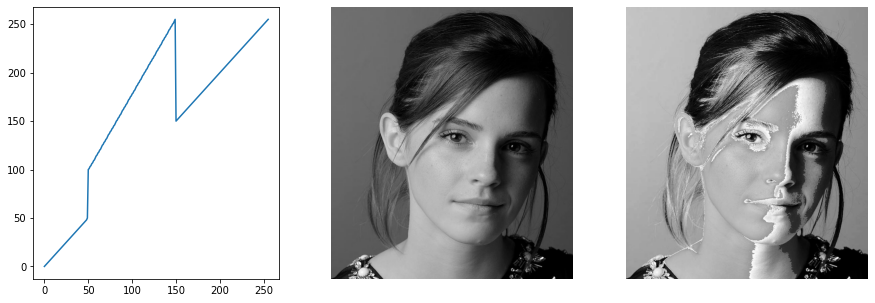

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'images/emma_gray.jpg')
assert img is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3), axis = 0).astype(np.uint8)
modified = cv.LUT(img , t)
fig , ax = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(5)
ax[0].plot(t)
ax[1].imshow(cv.cvtColor(img , cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[2].imshow(cv.cvtColor(modified , cv.COLOR_BGR2RGB))
ax[2].axis('off')


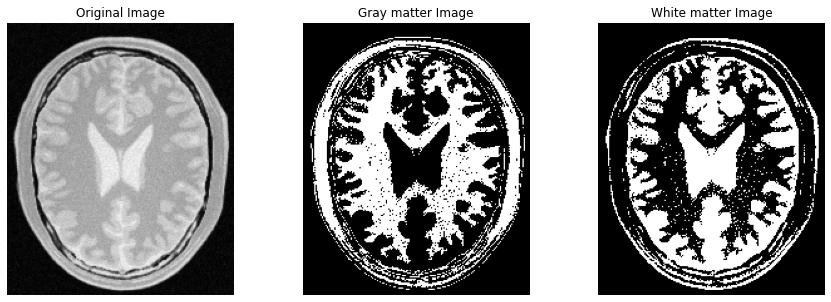

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'images/brain_proton_density_slice.png')
assert img is not None

t1 = [0]*100
t2 = [255]*80
t3 = [0]*76

t_gray = np.concatenate((t1,t2,t3), axis = 0).astype(np.uint8)
t_white = np.concatenate(([0]*180 , [255]*76) , axis = 0).astype(np.uint8)

gray = cv.LUT(img , t_gray)
white = cv.LUT(img , t_white)
fig , ax = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(5)
ax[0].imshow(cv.cvtColor(img , cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].title.set_text("Original Image")
ax[1].imshow(cv.cvtColor(gray , cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].title.set_text("Gray matter Image")
ax[2].imshow(cv.cvtColor(white , cv.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].title.set_text("White matter Image")